### Genetic Alg(GA) - 遗传算法

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math as m

#### OneMax 问题
OneMax问题是一个简单的优化任务，通常作为遗传算法Hello World。
OneMax任务是查找给定长度的二进制串，最大化该二进制串中数字的总和。例如，对于长度为5的OneMax问题，10010的数字总和为2，01110的数字总和为3。
显然，此问题的最优解为每位数字均为1的二进制串。但是对于遗传算法而言，其并不具备此知识，因此需要使用其遗传算子寻找最优解。算法的目标是在合理的时间内找到最优解，或者至少找到一个近似最优解。

In [ ]:
# genes 由二进制编码表示
class Chromosome:
    def __init__(self, genes):
        self.genes = genes
        self.fitness = self.calculate_fitness()

    # calc fitness
    def calculate_fitness(self):
        return sum(self.genes)

    # 突变
    def mutate(self, mutation_rate):
        for i in range(len(self.genes)):
            if random.random() < mutation_rate:
                self.genes[i] = 1 if self.genes[i] == 0 else 0
                self.fitness += 1 if self.genes[i] == 1 else -1

    # 交叉
    def crossover(self, other):
        crossover_point = random.randint(1, len(self.genes) - 1)
        new_genes = self.genes[:crossover_point] + other.genes[crossover_point:]
        return Chromosome(new_genes)

# 遗传算法参数
POPULATION_SIZE = 100
GENE_LENGTH = 100  # 染色体长度
MUTATION_RATE = 0.01
MAX_GENERATIONS = 500

# 1. 创建初始种群
population = [Chromosome([random.randint(0, 1) for _ in range(GENE_LENGTH)]) for _ in range(POPULATION_SIZE)]

# 2. 遗传算法主循环
for generation in range(MAX_GENERATIONS):
    # 2.1 计算适应度
    for individual in population:
        individual.fitness = individual.calculate_fitness()

    # 2.2 选择
    population = sorted(population, key=lambda x: x.fitness, reverse=True)
    population = population[:POPULATION_SIZE // 2]  # 只保留一半适应度最高的个体

    # 2.3 交叉和变异
    new_population = []
    while len(new_population) < POPULATION_SIZE:
        parent1 = random.choice(population)
        parent2 = random.choice(population)
        child = parent1.crossover(parent2)
        child.mutate(MUTATION_RATE)
        new_population.append(child)
    population = new_population

    # 打印当前最佳解
    best_individual = max(population, key=lambda x: x.fitness)
    print(f"Generation {generation}: Best Fitness = {best_individual.fitness}")

# 最终结果
best_individual = max(population, key=lambda x: x.fitness)
print(f"Best solution: Fitness = {best_individual.fitness}, Genes = {best_individual.genes}")

#### 单变量无约束优化问题
求解函数 $f(x) = x + 10*sin(5*x) + 7*cos(4*x)$ 在区间[0,9]的最大值。

第1次进化，种群中个体最优适应度: 24.85427519634743
第2次进化，种群中个体最优适应度: 24.85427519634743
第3次进化，种群中个体最优适应度: 24.850472467508943
第4次进化，种群中个体最优适应度: 24.726647977552666
第5次进化，种群中个体最优适应度: 24.855207830133324
第6次进化，种群中个体最优适应度: 24.855207830133324
第7次进化，种群中个体最优适应度: 24.84562690901451
第8次进化，种群中个体最优适应度: 24.855297639353466
第9次进化，种群中个体最优适应度: 24.84485839777577
第10次进化，种群中个体最优适应度: 24.84485839777577
第11次进化，种群中个体最优适应度: 24.84485839777577
第12次进化，种群中个体最优适应度: 24.840731611608106
第13次进化，种群中个体最优适应度: 24.854423057077476
第14次进化，种群中个体最优适应度: 24.79379550336955
第15次进化，种群中个体最优适应度: 24.497870562919477
第16次进化，种群中个体最优适应度: 24.84393909101464
第17次进化，种群中个体最优适应度: 24.771771842571166
第18次进化，种群中个体最优适应度: 24.596538103528566
第19次进化，种群中个体最优适应度: 24.771771842571166
第20次进化，种群中个体最优适应度: 24.84897619392703
第21次进化，种群中个体最优适应度: 24.761772883652355
第22次进化，种群中个体最优适应度: 24.761772883652355
第23次进化，种群中个体最优适应度: 24.782097298601972
第24次进化，种群中个体最优适应度: 24.55850245110608
第25次进化，种群中个体最优适应度: 24.854135576058653
第26次进化，种群中个体最优适应度: 24.834762067535177
第27次进化，种群中个体最优适应度: 24.673157719

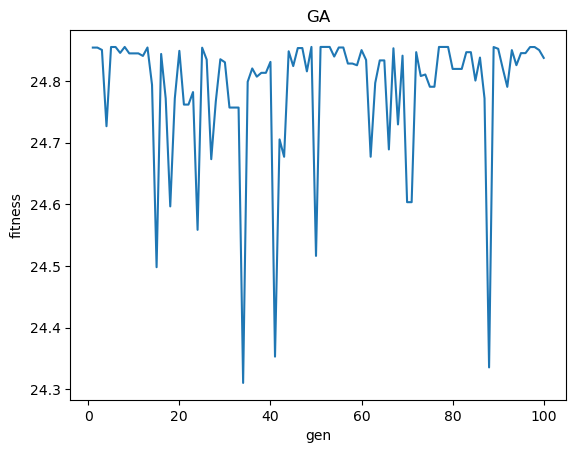

In [85]:
# 定义目标函数
def target_function(x):
    return x + 10*m.sin(5*x) + 7*m.cos(4*x)

# 定义解码函数 - 将编码空间基因映射到解空间
def decode(individual):
    # 解空间区间
    lower_bound = 10
    upper_bound = -10
    val = int(''.join(map(str, individual.gene)), 2)
    max_val = 2**len(individual.gene) - 1
    return lower_bound + (val / max_val) * (upper_bound - lower_bound) 

# 定义个体，代表种群中的一个个体,个体的属性由gene,fitness组成
class Individual:
    def __init__(self, gene):
        self.gene = gene
        self.fitness = self.calc_fitness()
    
    # 计算适应度函数，这里以基因的平方和为例
    # 适应度函数应根据具体问题进行定义
    def calc_fitness(self):
        x = decode(self)
        return target_function(x)

# 种群初始化
def initialize_population():
    # POPULATION_SIZE: 种群的大小
    # GENES_LENGTH: 个体基因序列的长度
    # 生成初始种群，每个个体由随机生成的基因序列组成
    return [Individual([random.randint(0, 1) for _ in range(GENES_LENGTH)]) for _ in range(POPULATION_SIZE)]


# 3. 定义GA基本操作
# 选择 - 精英选择 / 轮盘赌选择 / 锦标赛选择
def selection(population, num_of_parents, selec_mode='Elitism'):
    selected_population = []
    if selec_mode == "Elitism":
        # (reverse=True)排列population中的individual.fitness(lambda x: x.fitness)
        sorted_population = sorted(population, key=lambda x: x.fitness, reverse=True)
        selected_population = sorted_population[:num_of_parents]
        
    if selec_mode == "roulette_wheel":  # 轮盘赌选择 - 每个个体被选中的概率与其适应度成正比
        total_fitness = sum(individual.fitness for individual in population)
        for individual in population:
            pick_rate = individual.fitness / total_fitness
            pick = random.uniform(0, total_fitness)
            if individual.fitness > pick:
                selected_population.append(individual)
            if len(selected_population) == num_of_parents:
                break
        
    return selected_population
   
# 交叉 
def crossover(parent1, parent2):
    # 单点交叉
    # parent1, parent2: 选择的两个父本个体
    # 随机选择交叉点，交换父本基因，生成两个子代
    if random.random() < CROSSOVER_RATE:
        cross_point = random.randint(1, len(parent1.gene) - 1)      
        child1_gene = parent1.gene[cross_point:] + parent2.gene[:cross_point]
        child2_gene = parent2.gene[cross_point:] + parent1.gene[:cross_point]
        return Individual(child1_gene), Individual(child2_gene)
    else:
        return parent1, parent2
    
# 突变
def mutation(individual):
    # 对个体的基因序列进行随机变异
    # individual: 要变异的个体
    # MUTATION_RATE: 变异概率
    for i in range(len(individual.gene)):
        if random.random() < MUTATION_RATE:
            # gene序列中随机点发生突变
            individual.gene[i] = 1 if individual.gene[i] == 0 else 0 
    # 突变后更新fitness
    individual.fitness = individual.calc_fitness()

# GA超参数设置,consist of population size, genes length, generation times, mutation rate
POPULATION_SIZE = 1000
GENES_LENGTH = 17
MAX_GENERATIONS = 100
CROSSOVER_RATE = 0.6
MUTATION_RATE = 0.01

# 接口主函数   
history = {'generation': [], 'fitness': []}

def genetic_algorithm():
    # 1. 初始化种族
    population = initialize_population()
    
    global_best_individual = max(population, key=lambda x: x.fitness)
    global_best_gen = 0
    
    # 逻辑主循环
    for gen in range(MAX_GENERATIONS):
        # 2. 选择
        parents = selection(population, len(population) // 5)    # 选择一半的个体
        offspring = []
        while len(offspring) < POPULATION_SIZE:
            # 3. 交叉
            parent1, parent2 = random.sample(population, 2)
            child1, child2 = crossover(parent1, parent2)
            # 4. 突变
            mutation(child1)
            mutation(child2)
            offspring.extend([child1, child2])
            
        population = offspring
        
        # 择出当代种群最优个体
        local_best_individual = max(offspring, key= lambda x: x.fitness)
        # 判断择出历代种群最优个体
        if local_best_individual.fitness > global_best_individual.fitness:
            global_best_individual = local_best_individual
            global_best_gen = gen+1
        
        print(f"第{gen+1}次进化，种群中个体最优适应度: {local_best_individual.fitness}")
        history['generation'].append(gen+1)
        history['fitness'].append(local_best_individual.fitness)
    return global_best_individual, global_best_gen

# main
best, best_gen = genetic_algorithm()
print(f"最优个体基因: {best.gene},最优个体适应度: {best.fitness},最优个体产生于第{best_gen}代")
print(f"解码后对应的最优解x={decode(best)}")

# plt
plt.plot(history['generation'], history['fitness'])
plt.title('GA')
plt.xlabel('gen')
plt.ylabel('fitness')
plt.show()

#### 多变量多约束优化问题
求目标函数的最小值问题
$$
f(x) = x_1^2 + x_2^2 + 8
$$
在
$$
x_1^2 - x_2 > 0 ;
-x_1 - x_2^2 +2 = 0
$$
约束下的最小值问题

第1次进化，种群中个体最优适应度: -72.67839764251814
第2次进化，种群中个体最优适应度: -52.58841597132404
第3次进化，种群中个体最优适应度: -19.47420092593275
第4次进化，种群中个体最优适应度: -94.58239917462092
第5次进化，种群中个体最优适应度: -22.900086346683757
第6次进化，种群中个体最优适应度: -15.231366350144945
第7次进化，种群中个体最优适应度: -24.283546136903418
第8次进化，种群中个体最优适应度: -47.28497733424989
第9次进化，种群中个体最优适应度: -47.28497733424989
第10次进化，种群中个体最优适应度: -27.958001633141123
第11次进化，种群中个体最优适应度: -49.09724786539144
第12次进化，种群中个体最优适应度: -14.643759545116987
第13次进化，种群中个体最优适应度: -14.643759545116987
第14次进化，种群中个体最优适应度: -25.099335030244177
第15次进化，种群中个体最优适应度: -25.099335030244177
第16次进化，种群中个体最优适应度: -69.74869739984729
第17次进化，种群中个体最优适应度: -41.380726464137794
第18次进化，种群中个体最优适应度: -36.56767022206797
第19次进化，种群中个体最优适应度: -45.417480169999585
第20次进化，种群中个体最优适应度: -45.622820509541754
第21次进化，种群中个体最优适应度: -133.31485033296102
第22次进化，种群中个体最优适应度: -45.896718465517544
第23次进化，种群中个体最优适应度: -19.739794680091954
第24次进化，种群中个体最优适应度: -44.22260529591145
第25次进化，种群中个体最优适应度: -44.22260529591145
第26次进化，种群中个体最优适应度: -16.39200027206258
第27次进化，

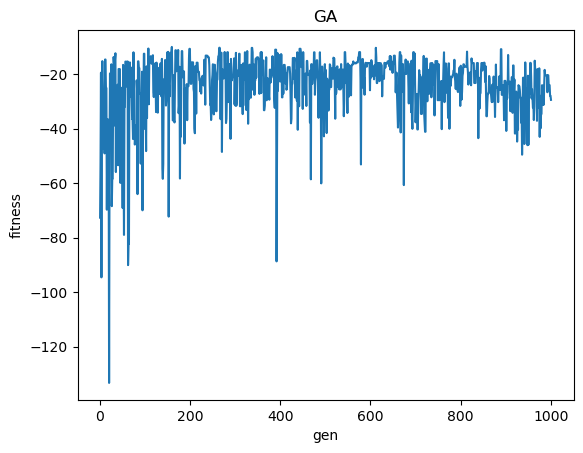

In [86]:
# 定义目标函数
def target_function(x):
    return x[0]**2 + x[1]**2 + 8

# 定义约束条件
# x_1^2 - x_2 > 0
def constraint_function_1(x):
    return x[0]**2 - x[1]

# -x_1 - x_2^2 +2 == 0
def constraint_function_2(x):
    return -x[0] - x[1]**2 + 2

def decode(individual):
    x1 = decode_gene_to_real(individual.gene[0])
    x2 = decode_gene_to_real(individual.gene[1])
    return [x1, x2]

# 定义解码函数 - 将编码空间基因映射到解空间
def decode_gene_to_real(gene):
    # 解空间区间
    lower_bound = 0
    upper_bound = 9
    val = int(''.join(map(str, gene)), 2)
    max_val = 2**len(gene) - 1
    return lower_bound + (val / max_val) * (upper_bound - lower_bound) 


# 适应度函数，包括约束的惩罚
def fitness(x, alpha=10, beta=1000):
    # 约束检查 Constraint Check 
    c1 = constraint_function_1(x)
    c2 = constraint_function_2(x)
    if c1 <= 0 or not m.isclose(c2, 0, abs_tol=1e-3):
        c1_penalty = 0
        c2_penalty = 0
        if c1 <= 0:             # 弱约束
            c1_penalty = alpha * abs(c1)
        if not m.isclose(c2, 0, abs_tol=1e-3):  # 强约束
            c2_penalty = beta * abs(c2)
            
        # 最小值问题，fitness是以大为优，需要翻转
        fitness_after_penalty = target_function(x) + c1_penalty + c2_penalty
        return -fitness_after_penalty  # penalty 严重惩罚不满足约束的个体
    
    
    return -target_function(x)

# 定义个体，代表种群中的一个个体,个体的属性由gene,fitness组成
class Individual:
    def __init__(self, gene):
        self.gene = gene
        self.fitness = self.calc_fitness()
    
    # 计算适应度函数，这里以基因的平方和为例
    # 适应度函数应根据具体问题进行定义
    def calc_fitness(self):
        x = decode(self)
        return fitness(x)

# 种群初始化
def initialize_population():
    # POPULATION_SIZE: 种群的大小
    # GENES_LENGTH: 个体基因序列的长度
    # 生成初始种群，每个个体由随机生成的基因序列组成
    
    return [Individual([[random.randint(0, 1) for _ in range(GENES_LENGTH)] for _ in range(2) ]) for _ in range(POPULATION_SIZE)]


# 3. 定义GA基本操作
# 选择
def selection(population, num_of_parents):
    # 选择种群中适应度高的前 num_of_parents 个个体
    # (reverse=True)排列population中的individual.fitness(lambda x: x.fitness)
    sorted_population = sorted(population, key=lambda x: x.fitness, reverse=True)
    return sorted_population[:num_of_parents]
    
# 交叉 
def crossover(parent1, parent2):
    # 单点交叉
    # parent1, parent2: 选择的两个父本个体
    # 随机选择交叉点，交换父本基因，生成两个子代
    if random.random() < CROSSOVER_RATE:
        cross_point = random.randint(1, len(parent1.gene[0]) - 1)      
        child1_gene = [parent1.gene[0][cross_point:] + parent2.gene[0][:cross_point]
                       , parent1.gene[1][cross_point:] + parent2.gene[1][:cross_point]]
        
        child2_gene = [parent2.gene[0][cross_point:] + parent1.gene[0][:cross_point]
                       , parent2.gene[1][cross_point:] + parent1.gene[1][:cross_point]]
        return Individual(child1_gene), Individual(child2_gene)
    else:
        return parent1, parent2
    
# 突变
def mutation(individual):
    # 对个体的基因序列进行随机变异
    # individual: 要变异的个体
    # MUTATION_RATE: 变异概率
    for dim in range(2):
        for i in range(len(individual.gene)):
            if random.random() < MUTATION_RATE:
                # gene序列中随机点发生突变
                individual.gene[dim][i] = 1 if individual.gene[i] == 0 else 0 
    # 突变后更新fitness
    individual.fitness = individual.calc_fitness()

# GA超参数设置,consist of population size, genes length, generation times, mutation rate
POPULATION_SIZE = 1000
GENES_LENGTH = 17
MAX_GENERATIONS = 1000
MUTATION_RATE = 0.01
CROSSOVER_RATE = 0.6


history = {'generation': [], 'fitness': []}

# 接口主函数    
def genetic_algorithm():
    # 1. 初始化种族
    population = initialize_population()
    
    global_best_individual = max(population, key=lambda x: x.fitness)
    global_best_gen = 0
    
    # 逻辑主循环
    for gen in range(MAX_GENERATIONS):
        # 2. 选择
        parents = selection(population, len(population) // 2)    # 选择一半的个体
        offspring = []
        while len(offspring) < POPULATION_SIZE:
            # 3. 交叉
            parent1, parent2 = random.sample(population, 2)
            child1, child2 = crossover(parent1, parent2)
            # 4. 突变
            mutation(child1)
            mutation(child2)
            offspring.extend([child1, child2])
        population = offspring
        
        # 择出当代种群最优个体
        local_best_individual = max(offspring, key= lambda x: x.fitness)
        # 择出历代种群最优个体
        if local_best_individual.fitness > global_best_individual.fitness:
            global_best_individual = local_best_individual
            global_best_gen = gen + 1
            
        print(f"第{gen+1}次进化，种群中个体最优适应度: {local_best_individual.fitness}")
        history['generation'].append(gen+1)
        history['fitness'].append(local_best_individual.fitness)
    return global_best_individual, global_best_gen

# main
best, best_gen = genetic_algorithm()
best_x = decode(best)
print(f"最优个体基因: {best.gene},最优个体适应度: {best.fitness},最优个体产生于第{best_gen}代")
print(f"解码后对应的最优解x={best_x},f(x)={target_function(best_x)}")
print(f"约束情况1：{constraint_function_1(best_x)};约束情况2：{constraint_function_2(best_x)}")

# plt
plt.plot(history['generation'], history['fitness'])
plt.title('GA')
plt.xlabel('gen')
plt.ylabel('fitness')
plt.show()